In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
import warnings

warnings.filterwarnings('ignore')
np.random.seed(42)

In [105]:
data = pd.read_excel('wildfires.xlsx')

In [106]:
data.head(20)

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,no,2015,28,59,0.0,8.06,3.47,1,6,19
1,no,2010,30,61,1.3,8.17,4.03,2,6,13
2,no,2009,26,83,13.1,8.08,3.59,3,6,22
3,no,2017,25,87,2.5,7.18,2.42,4,6,15
4,no,2014,28,77,0.0,14.98,4.63,5,6,18
5,yes,2008,30,67,0.0,22.71,7.97,6,6,14
6,yes,2013,32,52,0.0,30.98,11.86,7,6,14
7,yes,2009,29,72,0.0,38.66,14.31,8,6,17
8,no,2014,26,89,0.2,39.62,10.76,9,6,15
9,no,2007,28,77,0.0,46.44,13.14,10,6,13


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fire           204 non-null    object 
 1   year           204 non-null    int64  
 2   temp           204 non-null    int64  
 3   humidity       204 non-null    int64  
 4   rainfall       204 non-null    float64
 5   drought_code   204 non-null    float64
 6   buildup_index  204 non-null    float64
 7   day            204 non-null    int64  
 8   month          204 non-null    int64  
 9   wind_speed     204 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 16.1+ KB


In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

In [110]:
data['fire_type'] = pd.factorize(data['fire'])[0]

In [111]:
data.head(10)

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed,fire_type
0,no,2015,28,59,0.0,8.06,3.47,1,6,19,0
1,no,2010,30,61,1.3,8.17,4.03,2,6,13,0
2,no,2009,26,83,13.1,8.08,3.59,3,6,22,0
3,no,2017,25,87,2.5,7.18,2.42,4,6,15,0
4,no,2014,28,77,0.0,14.98,4.63,5,6,18,0
5,yes,2008,30,67,0.0,22.71,7.97,6,6,14,1
6,yes,2013,32,52,0.0,30.98,11.86,7,6,14,1
7,yes,2009,29,72,0.0,38.66,14.31,8,6,17,1
8,no,2014,26,89,0.2,39.62,10.76,9,6,15,0
9,no,2007,28,77,0.0,46.44,13.14,10,6,13,0


In [112]:
X = data.drop(['fire','fire_type'],axis = 1)
X

,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
0,2015,28,59,0.0,8.06,3.47,1,6,19
1,2010,30,61,1.3,8.17,4.03,2,6,13
2,2009,26,83,13.1,8.08,3.59,3,6,22
3,2017,25,87,2.5,7.18,2.42,4,6,15
4,2014,28,77,0.0,14.98,4.63,5,6,18
...,...,...,...,...,...,...,...,...,...
199,2017,31,67,0.0,45.15,17.89,26,9,15
200,2017,29,89,4.4,8.74,6.52,27,9,15
201,2009,27,88,0.5,8.87,3.71,28,9,30
202,2016,25,56,0.1,15.54,6.10,29,9,20


In [113]:
y = data['fire_type']
y.value_counts()

1    107
0     97
Name: fire_type, dtype: int64

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state = 42)

In [117]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
class Perceptron:

  #1. Define an initial constructor
  def __init__ (self, learning_rate = 0.1, n_iters = 1000):
    self.weights = None
    self.bias = None
    self.iterations = n_iters
    self.learning_rate = learning_rate
    
  #sigmoid function
  def sigmoid(self, x):
    return (1.0 / (1.0 + np.exp(-x)))   #Reference: https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python

  #Classification based on comparison between activation result and bias
  def classifier(self, activation):
    threshold = self.bias
    if activation <= threshold:
      return 0
    else:
      return 1

  #Train the single neural node using the fit method to make it ready for use ahead
  def fit(self, X, Y):
    #Making an array of ones for each column in the dataframe
    self.weights = np.random.rand(X.shape[1]) 

    #Initial assignment of bias to calculate further
    self.bias = 0
    
    #Iterating for 'n_iters' time to adjust weight and bias each time we fit the data
    for i in range(self.iterations):
      for row, label in zip(X, Y):
        result = self.sigmoid(np.dot(self.weights, row) + self.bias)
        y_pred = self.classifier(result)

        #To minimise error, we adjust the weights and the bias according to the learning rate
        if label == 1 and y_pred == 0:
          self.weights = self.weights + self.learning_rate * row
          self.bias = self.bias - self.learning_rate * 1
        elif label == 0 and y_pred == 1:
          self.weights = self.weights - self.learning_rate * row
          self.bias = self.bias + self.learning_rate * 1
    
    return self

  #Defining the predict method to pass new data and calculating labels for them using the existing model
  def predict(self, new_data):
    #List to hold the predictions given for 'n' rows of data
    predictions = []
    self.pred_proba = []

    #Predicting label for each row and appending it to the list
    for row in new_data:
      result = self.sigmoid(np.dot(self.weights, row) + self.bias)
      self.pred_proba.append(result)
      predictions.append(self.classifier(result))
    
    #Returning an Numpy Array of predictions
    return np.array(predictions)

In [119]:
per = Perceptron()
slp = Perceptron()

In [120]:
cv = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

In [121]:
y_train, y_test = np.array(y_train), np.array(y_test)

In [122]:
scores = []
validate = 0
for train, test in cv.split(X_train, y_train):
    per.fit(X_train[train], y_train[train])
    score = accuracy_score(y_train[test], per.predict(X_train[test]))
    scores.append(score)
    for i in scores:
        if i > validate:
            validate = i
            slp = per.fit(X_train[train],y_train[train])

print(f"Scores: {scores}")
print(f"Best Score: {validate}")
print(f"Model Taken: {slp}")


Scores: [0.8928571428571429, 0.9259259259259259, 0.7777777777777778, 0.8888888888888888, 0.8148148148148148]
Best Score: 0.9259259259259259
Model Taken: <__main__.Perceptron object at 0x00000284913E8210>


In [123]:
y_pred = slp.predict(X_test)
y_pred_proba = slp.pred_proba

In [124]:
print(y_pred)

[0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1]


In [125]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)} \n")

Accuracy Score: 0.8529411764705882 



In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        32
           1       0.78      1.00      0.88        36

    accuracy                           0.85        68
   macro avg       0.89      0.84      0.85        68
weighted avg       0.88      0.85      0.85        68



<AxesSubplot: >

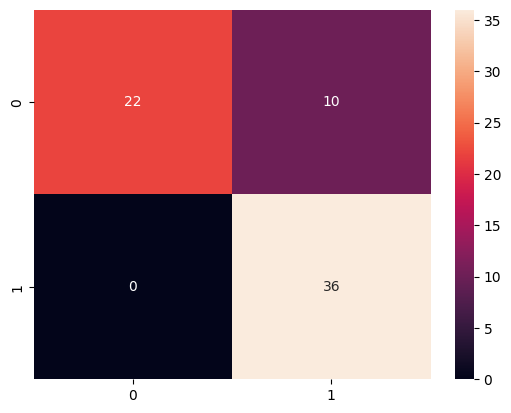

In [127]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot = True)

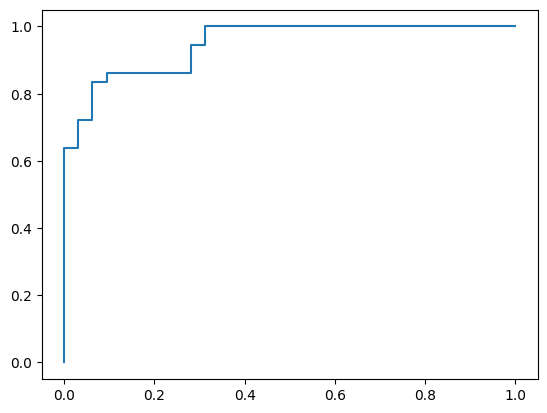

In [128]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba)
plt.plot(false_positive_rate, true_positive_rate)

Implementing Logistic Regression using Scikit Learn and comparing the output

In [129]:
from sklearn.linear_model import LogisticRegression

In [130]:
log = LogisticRegression()

In [131]:
log.fit(X_train, y_train)

LogisticRegression()

In [132]:
log_pred = log.predict(X_test)
print(log_pred)

[0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1]


In [133]:
print(f"Accuracy Score: {accuracy_score(y_test, log_pred)} \n")

Accuracy Score: 0.7794117647058824 



In [134]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.80      0.78      0.79        36

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



<AxesSubplot: >

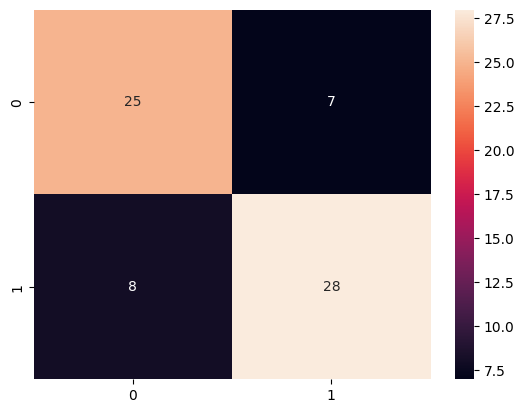

In [135]:
cf_matrix = confusion_matrix(y_test,log_pred)
sns.heatmap(cf_matrix, annot = True)

In [136]:
log_pred_proba = log.predict_proba(X_test)[:,1]

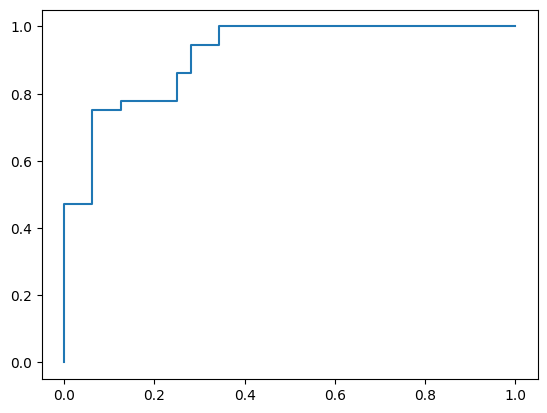

In [137]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, log_pred_proba)
plt.plot(false_positive_rate, true_positive_rate)